<a href="https://colab.research.google.com/github/shlok-py/Networkx-tuts/blob/main/networkx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#installing dependencies
!pip install ipython-autotime
import networkx as nx
import numpy as np
%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 4.9 MB/s 
time: 547 µs (started: 2022-12-25 07:37:51 +00:00)


## **Question**

Suppose you had an application for python programmer with networkx specilization for XYZ AI based company. Before live demonstration, selection committee send you a networkx problem as graph G1 shown in the attachment. All you need to do is that you have to prepare a quotient graph of G1(shown in attachment) in which partition for equivalence relation is given by 
P = { {v1}, {v2},  {v3, v6},  {v4},  {v5}} to obtain the new graph G2(shown in attachment).

Read documentation of quotient_graph on networkx carefully, you can find that it has called _quotient_graph. On _quotient_graph you have to define the node_data to obtain node feature for merged node {v3, v6} as the average of node features of v3 and v6 and unmerged nodes should have same node features as graph G1.


Keep in mind that you have 27 other competitors for the same post and your novel idea is highly appreciated.

The Code Snippet Below Draws the Graph G1 as the picutre below (i.e., as in the question) as well as gives the node data as in the question.bold text
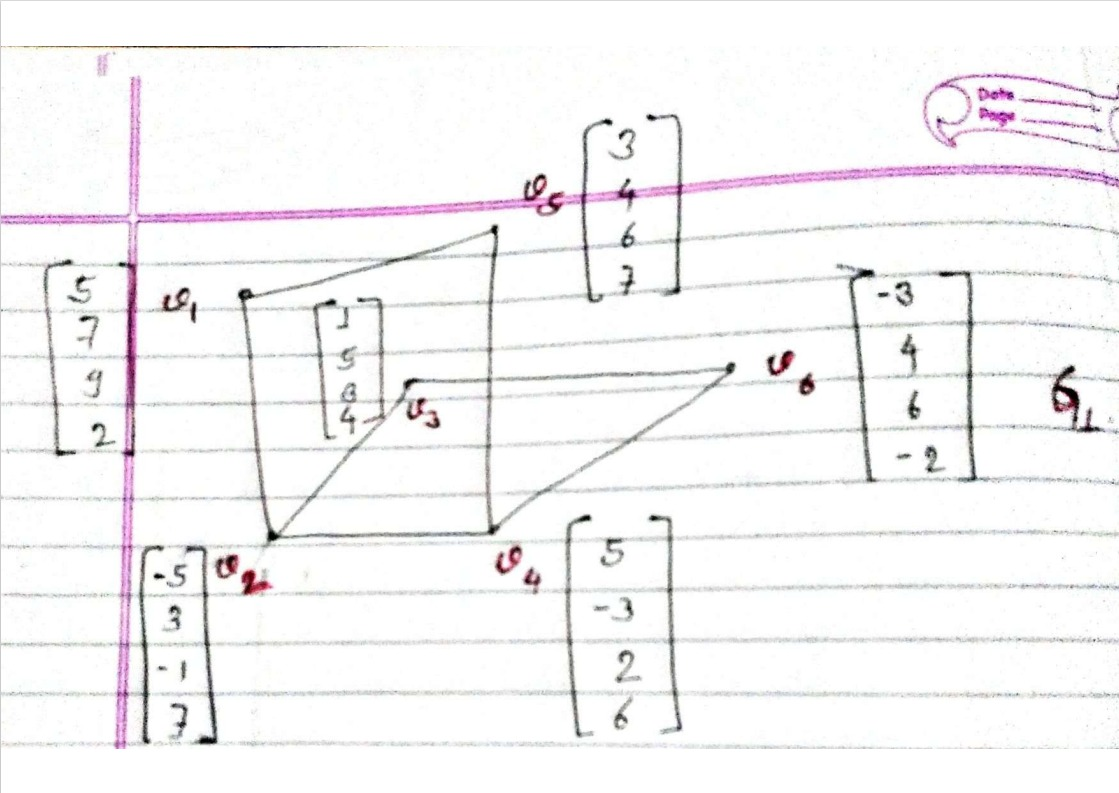


CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 15.5 µs


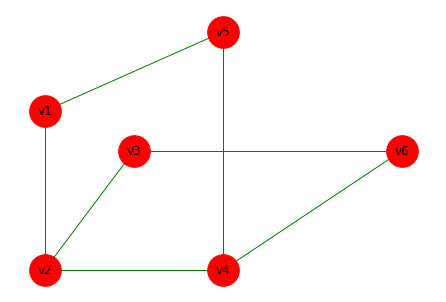

time: 261 ms (started: 2022-12-25 07:37:58 +00:00)


In [ ]:
%time
G1 = nx.Graph()
G1.add_node("v1", data = [5,7,9,2])
G1.add_node("v2", data = [-5,3,-1,7])
G1.add_node("v3", data = [1,5,3,4])
G1.add_node("v4", data = [5,-3,2,6])
G1.add_node("v5", data = [3,4,6,7])
G1.add_node("v6", data = [-3,4,6,-2])

G1.add_edge('v1','v2')

G1.add_edge('v1','v5')
G1.add_edge('v2','v3')
G1.add_edge('v2','v4')

G1.add_edge('v5','v4')

G1.add_edge('v3','v6')
G1.add_edge('v4','v6')

pos = {"v1": (40, 20), "v2": (40, 0), "v3": (55, 15), "v4": (70, 0), "v5":(70,30), "v6":(100, 15)} 
label = {"v1":"v1","v2": "v2", "v3": "v3","v4": "v4","v5":"v5","v6":"v6"}
nx.draw(G1, pos, node_size = 1000, node_color = 'r', edge_color = 'g', labels = label)


The code below merges two nodes and calculates the average of node datas.

In [ ]:
%time
partition = {"v1" : {"v1"}, "v2" : {"v2"}, "v3" : {"v3", "v6"}, "v4" : {"v4"},  #defining the partition
             "v5" :{"v5"}}

nodes = [i for i in partition.values() if len(i)>1]                             #takes the merged nodes from the relation and parition

# for i in partition.values():
#     if len(i)>1:
#         nodes = list(i)

g1_nodes = {}                                                                    #initialised a dictionary to store node_Data from G1
merged_data = {}                                                                 #initialised a dictionary to store Node Data from G2




'''take all the node and node_Data from G1 and store in the dictionary as
g1_nodes = {
     "node_name": node_Data
    }
'''

for all_nodes, data in G1.nodes(data = True):
    g1_nodes[all_nodes] = data['data']



'''
Unoptimised code for taking the average
# for all_nodes, data in G1.nodes(data = True):
#     g1_nodes[all_nodes] = data['data']
#     if all_nodes in nodes[0]:
#         a += np.asarray(data['data'])
# print(a,a/2)
'''

                                                                                #Initialised Quotient Graph G2
G2 = nx.quotient_graph(G1, partition)


for m_nodes, _1 in zip(G2.nodes, g1_nodes.values()):                            #copy the remaining node data in to merged_Data Dictionary
    for i in nodes:
        if m_nodes != frozenset(i):
            merged_data[m_nodes] = np.asarray(_1)
        else:
            merged_data[m_nodes] = []




                                                                                #optimised code to take the mean, even if the data gets changes i.e. 
                                                                                #merged_nodes are changed
for i in nodes:
    # print(i)                                                                  #this code prints the merged nodes
    a = []                                                                      #initialised a list to store merged node data
    for j in i:                                                                 #loop throud the set of merged nodes on by one
        # print("j = ", j)
        # print("g1_nodes[j]", g1_nodes[j])
        a.append(g1_nodes[j])                                                   #append the merged node data in the list
    a = np.array(a)                                                             #convert the list into a numpy array
    mean_data = a.mean(axis = 0)                                                #compute column wise mean
    # print(mean_data)
    merged_data[frozenset(i)] = mean_data                                       #put the mean data in the dictionary where the node data of G2 is kept i.e., 
                                                                                #this line of code keep the frozenset of merged node as key and the average 
                                                                                #node feature as the value

# print(merged_data)

for m_nodes, _1 in zip(G2.nodes, merged_data.values()):                         #Put the final Node data of G2 as the Node data of G2 from the merged_data dict
    G2.nodes[m_nodes]['data'] = _1
# print(G2.nodes(data = True))



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.87 µs
time: 10.7 ms (started: 2022-12-25 07:48:15 +00:00)


Draw the graph G2 as in the picture.
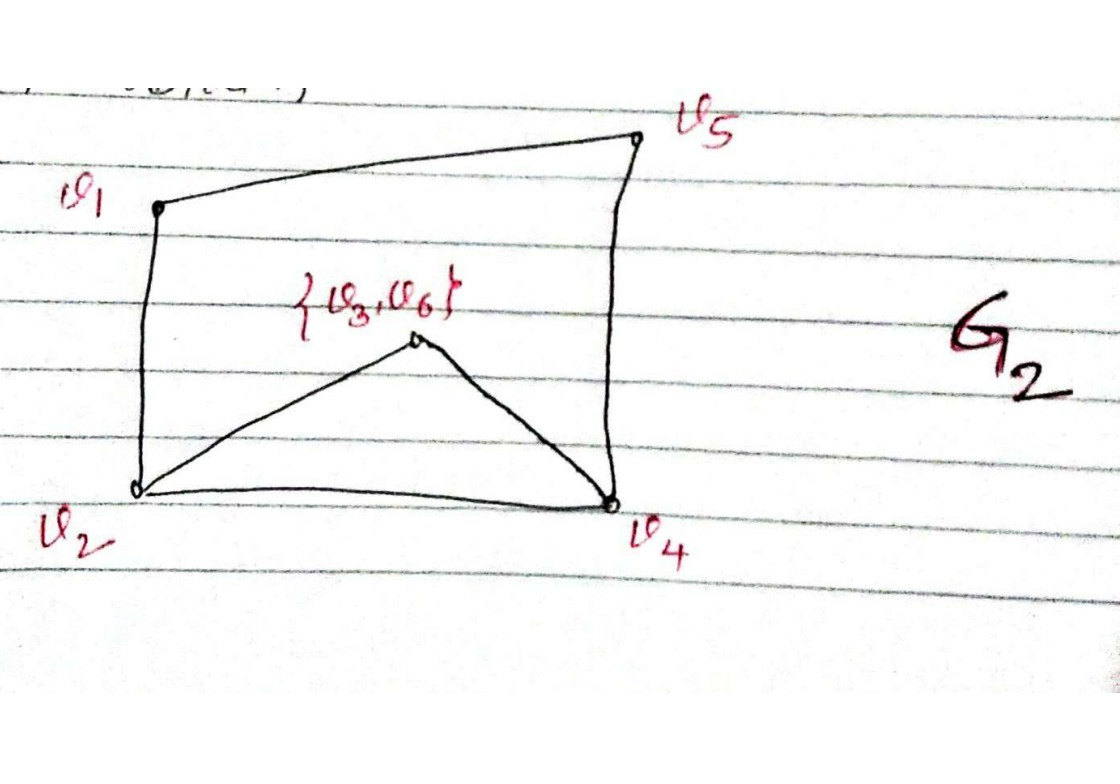

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 8.58 µs
v1	:	[5 7 9 2]
v2	:	[-5  3 -1  7]
v3,v6	:	[-1.   4.5  4.5  1. ]
v4	:	[ 5 -3  2  6]
v5	:	[3 4 6 7]


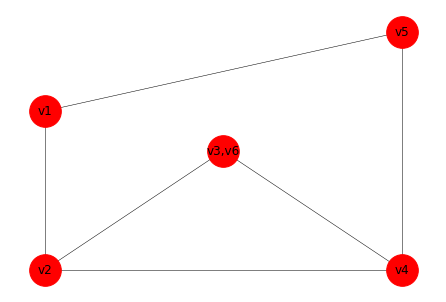

time: 235 ms (started: 2022-12-25 07:48:18 +00:00)


In [ ]:
%time
pos = {                                                                         #defining the position of nodes as in the question
       'v1': (40, 20), 
       'v2': (40, 0), 
       'v3,v6': (55, 15), 
       'v4': (70, 0), 
       'v5':(70,30)
       } 

mapping = {frozenset({'v1'}): 'v1',                                             #relabelling the nodes for ease and requirement
           frozenset({'v2'}): 'v2', 
           frozenset({'v3','v6'}): 'v3,v6', 
           frozenset({'v4'}): 'v4', 
           frozenset({'v5'}): 'v5'}
G2=nx.relabel_nodes(G2, mapping)
       
nx.draw(G2, pos = pos, with_labels = True, node_size = 1000, node_color = "r", width = 0.5)


# print(G2.nodes[frozenset({'v5'})]['data'])
for node,data in G2.nodes(data = True):
    print(f"{node}\t:\t{G2.nodes[node]['data']}")